In [1]:
import pandas as pd
import seaborn as sns

In [2]:
house = pd.read_csv('Housing.csv')

In [4]:
house.shape

(545, 13)

In [6]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
house.duplicated().sum()

np.int64(0)

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [58]:
house.sample(5)

price  area  bedrooms  bathrooms  stories  basement  parking
501  2660000.0  2430         3          1        1         0        0
103  6195000.0  6350         3          2        3         0        0
506  2604000.0  2910         2          1        1         0        0
200  4900000.0  4520         3          1        2         1        0
301  4200000.0  3520         3          1        2         0        0

In [59]:
house[['price','bedrooms','area','bathrooms','stories']].corr()

price  bedrooms      area  bathrooms   stories
price      1.000000  0.366494  0.535997   0.517545  0.420712
bedrooms   0.366494  1.000000  0.151858   0.373930  0.408564
area       0.535997  0.151858  1.000000   0.193820  0.083996
bathrooms  0.517545  0.373930  0.193820   1.000000  0.326165
stories    0.420712  0.408564  0.083996   0.326165  1.000000

In [22]:
house['mainroad'] = house['mainroad'].map({'yes':1, 'no': 0 })
house['guestroom'] = house['guestroom'].map({'yes':1, 'no': 0 })
house['basement'] = house['basement'].map({'yes':1, 'no': 0 })
house['hotwaterheating'] = house['hotwaterheating'].map({'yes':1, 'no': 0 })
house['airconditioning'] = house['airconditioning'].map({'yes':1, 'no': 0 })
house['prefarea'] = house['prefarea'].map({'yes':1, 'no': 0 })
house['furnishingstatus'] = house['furnishingstatus'].map({'unfurnished': 0,'semi-furnished':1,'furnished':2 })

In [51]:
print(house.dtypes)


price               float64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus      int64
dtype: object


In [29]:
house.fillna(0, inplace=True)


In [50]:
house['price'] = house['price'].astype(float)
house['mainroad'] = house['mainroad'].astype(int)
house['guestroom'] = house['guestroom'].astype(int)
house['hotwaterheating'] = house['hotwaterheating'].astype(int)
house['airconditioning'] = house['airconditioning'].astype(int)
house['prefarea'] = house['prefarea'].astype(int)
house['furnishingstatus'] = house['furnishingstatus'].astype(int)

In [54]:
constant_columns = house.nunique()  # Find columns with a single unique value
print(constant_columns[constant_columns == 1])

mainroad            1
guestroom           1
hotwaterheating     1
airconditioning     1
prefarea            1
furnishingstatus    1
dtype: int64


In [55]:
house = house.drop(columns=constant_columns[constant_columns == 1].index)


In [56]:
house.isnull().sum()


price        0
area         0
bedrooms     0
bathrooms    0
stories      0
basement     0
parking      0
dtype: int64

In [57]:
house.corr()

price      area  bedrooms  bathrooms   stories  basement  \
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.187057   
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.047417   
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.097312   
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.102106   
stories    0.420712  0.083996  0.408564   0.326165  1.000000 -0.172394   
basement   0.187057  0.047417  0.097312   0.102106 -0.172394  1.000000   
parking    0.384394  0.352980  0.139270   0.177496  0.045547  0.051497   

            parking  
price      0.384394  
area       0.352980  
bedrooms   0.139270  
bathrooms  0.177496  
stories    0.045547  
basement   0.051497  
parking    1.000000

<Axes: xlabel='area', ylabel='price'>

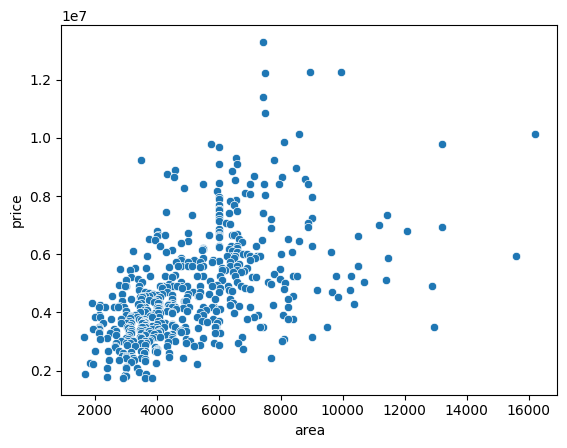

In [60]:
sns.scatterplot(data=house, x='area', y='price')

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
X = house.drop(columns='price')
y = house['price']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_test)

In [79]:
X_test.head()

area  bedrooms  bathrooms  stories  basement  parking
316  5900         4          2        2         1        1
77   6500         3          2        3         0        0
360  4040         2          1        1         0        0
90   5000         3          1        2         0        0
493  3960         3          1        1         0        0

In [80]:
y_test.head()

316    4060000.0
77     6650000.0
360    3710000.0
90     6440000.0
493    2800000.0
Name: price, dtype: float64

In [78]:
y_pred_df = pd.DataFrame(y_pred, columns=["Predictions"])
y_pred_df.head()

Predictions
0  6.553897e+06
1  6.180579e+06
2  3.015048e+06
3  3.998917e+06
4  3.060879e+06

In [81]:
from sklearn.metrics import r2_score
# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.5490815575740974


In [87]:
def check_price(values):
    price = lr.predict(values)
    return price.round(2)

In [91]:
values = [[3300,3,2,1,0,0]]
check_price(values).item()

C:\Users\WIN 10 PRO\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3960461.42

In [92]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)